In [ ]:
import pandas as pd
import os

# concatenate all CSV files in the /data folder into a single CSV file

# Path to the data folder
data_folder = "./data/"

# List all files in the data folder with .csv extension
files = [os.path.join(data_folder, f) for f in os.listdir(data_folder) if f.endswith('.csv')]

# Read and concatenate all CSV files
dfs = [pd.read_csv(file) for file in files]
combined_df = pd.concat(dfs, ignore_index=True)

# Save the combined dataframe to a new CSV
combined_df.to_csv('mac_dataset.csv', index=False)

print("All CSV files in the /data folder have been combined.")

In [11]:
import re
import csv
import os

def extract_games_from_pgn(filename):
    with open(filename, 'r') as file:
        data = file.read()

    # Regular expression to match the games without the scores
    games = re.findall(r'\b1\.[^\[]+?(?=\s[01]/[012]-[01]/[012])', data, re.DOTALL)

    
    return games

def save_to_csv(games, output_filename):
    with open(output_filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['completion'])
        for game in games:
            writer.writerow([game.replace('\n', ' ')])

if __name__ == "__main__":
    # List all files in the current directory with .pgn extension
    pgn_files = [file for file in os.listdir() if file.endswith('.pgn')]
    
    all_games = []
    
    # Extract games from each pgn file and add to the all_games list
    for pgn_file in pgn_files:
        print(pgn_file)
        games = extract_games_from_pgn(pgn_file)
        all_games.extend(games)
    
    save_to_csv(all_games, 'games.csv')


Shirov.pgn
Nakamura.pgn
PolgarS.pgn
Adams.pgn
Carlsen.pgn
Fischer.pgn
Nepomniachtchi.pgn
Tal.pgn
Shulman.pgn
Ljubojevic.pgn
GurevichD.pgn
So.pgn
Andersson.pgn
VachierLagrave.pgn
Karpov.pgn
Bologan.pgn


count    310.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
dtype: float64


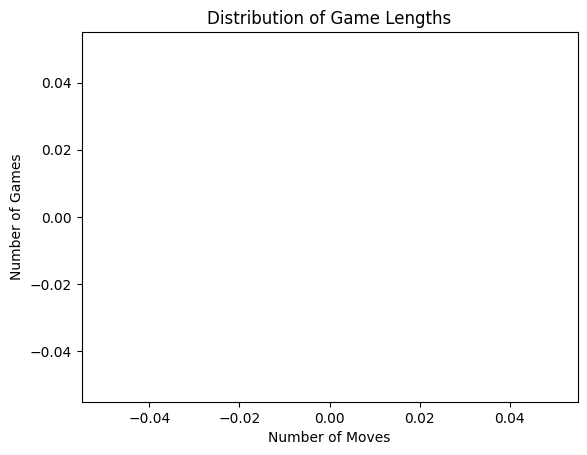

In [11]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
def read_csv(filename):
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header
        games = [row[0] for row in reader]
    return games

# Extract the number of moves from each game
def get_moves_count(game):
    # Split the game string by spaces and divide by 2 (because every 2 strings represent a move for white and black)
    return len(game.split()) // 2

# Analyze the distribution of game lengths
def analyze_distribution(games):
    moves_counts = [get_moves_count(game) for game in games]
    
    # Use pandas for statistical analysis
    series = pd.Series(moves_counts)
    print(series.describe())

    # Plot the distribution
    plt.hist(moves_counts, bins=range(1, series.max() + 2), align='left', edgecolor='black')
    plt.xlabel('Number of Moves')
    plt.ylabel('Number of Games')
    plt.title('Distribution of Game Lengths')
    plt.show()

if __name__ == "__main__":
    games = read_csv('games.csv')
    analyze_distribution(games)


In [84]:
import pandas as pd
import csv
import json 
# File paths
csv_path = 'full_dataset.csv'
jsonl_path = 'chess_completions2.jsonl'


# Load the games.csv file
df = pd.read_csv(csv_path)


with open(csv_path, 'r') as csv_file, open(jsonl_path, 'w') as jsonl_file:
    reader = csv.DictReader(csv_file)

    for row in reader:

        # Convert to JSON format with "text" as key
        json_obj = {"text": row['transcript']}

        # Write to jsonl file
        jsonl_file.write(json.dumps(json_obj) + '\n')

print(f"Conversion complete. Data written to {jsonl_path}")


Conversion complete. Data written to chess_completions2.jsonl


In [85]:
# Concatenate two JSONL files

input_files = ['chess_completions1.jsonl', 'chess_completions2.jsonl']
output_file = 'chess_completions.jsonl'

with open(output_file, 'w') as outfile:
    for fname in input_files:
        with open(fname) as infile:
            for line in infile:
                outfile.write(line)

print(f"Concatenation complete. Check {output_file}")

Concatenation complete. Check chess_completions.jsonl


In [86]:
import random

# Read all lines from the file
with open('chess_completions.jsonl', 'r') as file:
    lines = file.readlines()

# Shuffle the lines
random.shuffle(lines)

# Write the shuffled lines back to the file
with open('chess_completions.jsonl', 'w') as file:
    for line in lines:
        file.write(line)

In [1]:
import json

input_filename = "mixed_chess_owt_2gb.jsonl"
output_filename = "chess_owt_2gb.txt"

with open(input_filename, 'r') as infile, open(output_filename, 'w') as outfile:
    for line in infile:
        entry = json.loads(line)
        text = entry['text']
        outfile.write(text)
        outfile.write('\n')
        
        # Extracting moves which start after two newline characters
        # moves = text.split('\n\n')[1].strip()
        # outfile.write(moves + '\n')

print(f"Moves extracted to {output_filename}")

Moves extracted to chess_owt_2gb.txt


In [88]:
# Define the path to your file
filename = "chess_moves.txt"

# Initialize the maximum length to 0
max_length = 0

# Open and read the file line by line
with open(filename, 'r') as f:
    for line in f:
        if len(line) > max_length:
            max_length = len(line)

print(f"The length of the longest line is: {max_length}")


The length of the longest line is: 4580


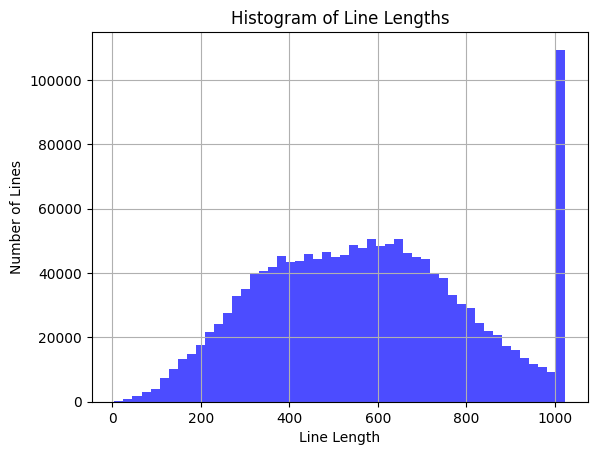

In [95]:
import matplotlib.pyplot as plt

# Define the path to your file
filename = "chess_moves.txt"

# List to store lengths of lines
line_lengths = []

# Open and read the file line by line
with open(filename, 'r') as f:
    for line in f:
        line_lengths.append(len(line))

# Plotting the histogram
plt.hist(line_lengths, bins=50, facecolor='blue', alpha=0.7)
plt.title('Histogram of Line Lengths')
plt.xlabel('Line Length')
plt.ylabel('Number of Lines')
plt.grid(True)

plt.show()


In [100]:
filename = "chess_moves.txt"

# print the length of the entire file
print("The length of the entire file is: ")
print(len(open(filename).read()))

The length of the entire file is: 
896958613


In [101]:
# Define the input file name
input_filename = 'chess_moves.txt'

# Read all lines into memory
with open(input_filename, 'r') as infile:
    lines = infile.readlines()
print(len(lines))
# Modify each line to ensure its content length is <= 1023 characters
trimmed_lines = []

for line in lines:
    if len(line) > 1023:
        trimmed_line = line[:1023] + '\n'
    else:
        trimmed_line = line
    trimmed_lines.append(trimmed_line)

# Overwrite the original file with the modified lines
with open(input_filename, 'w') as outfile:
    outfile.writelines(trimmed_lines)

print(f"File '{input_filename}' has been modified.")


1554519
File 'chess_moves.txt' has been modified.
